In [2]:
import pandas as pd

# CONSTANTS
BASIC_EXPENDITURES = ['FOOD', 'CLOTH', 'HOUSING_WATER', 'HEALTH', 'EDUCATION']
REGIONS = {
    1: "Region I - Ilocos Region",
    2: "Region II - Cagayan Valley",
    3: "Region III - Central Luzon",
    4: "Region IVA - CALABARZON",
    5: "Region V - Bicol",
    6: "Region VI - Western Visayas",
    7: "Region VII - Central Visayas",
    8: "Region VIII - Eastern Visayas",
    9: "Region IX - Zamboanga Peninsula",
    10: "Region X - Northern Mindanao",
    11: "Region XI - Davao",
    12: "Region XII - SOCCSKSARGEN",
    13: "National Capital Region",
    14: "Cordillera Administrative Region",
    15: "Autonomous Region in Muslim Mindanao (ARMM)",
    16: "Region XIII - Caraga",
    19: "Bangsamoro Autonomous Region in Muslim Mindanao",
    17: "Region IVB - MIMAROPA",
}

def extract_basic_expenditures(filename: str) -> pd.DataFrame:
    fies = pd.read_csv(f'./datasets/raw/{filename}.csv')
    fies_basic_needs = fies[['W_REGN'] + BASIC_EXPENDITURES]
    fies_basic_needs = fies_basic_needs.sort_values(by=['W_REGN'])
    fies_grouped = (fies_basic_needs.groupby('W_REGN', as_index=True).mean())
    fies_grouped['TOTAL_ANNUAL'] = fies_grouped[BASIC_EXPENDITURES].sum(axis=1)
    fies_grouped['TOTAL_MONTHLY'] = fies_grouped['TOTAL_ANNUAL'] / 12
    fies_grouped['REGION'] = fies_grouped.index.map(REGIONS)
    fies_grouped = fies_grouped[
        ['REGION'] + BASIC_EXPENDITURES + ['TOTAL_ANNUAL', 'TOTAL_MONTHLY']
    ]
    return fies_grouped

In [3]:
# CLEANED FIES TABLES FOR 2023, 2021, 2018
fies_2023 = extract_basic_expenditures('fies_2023')
fies_2021 = extract_basic_expenditures('fies_2021')
fies_2018 = extract_basic_expenditures('fies_2018')

# Reassign ARMM (15) -> BARMM (19) in 2021 and 2018
for df in [fies_2021, fies_2018]:
    # Change index value 15 -> 19
    df.index = df.index.to_series().replace(15, 19)
    if 'REGION' in df.columns:
        df['REGION'] = df.index.map(REGIONS)

# Sort again after reassigning indexes
fies_2021 = fies_2021.sort_index()
fies_2018 = fies_2018.sort_index()

display(fies_2023)
display(fies_2021)
display(fies_2018)

fies_2023.to_csv('./datasets/clean/fies_2023.csv')
fies_2021.to_csv('./datasets/clean/fies_2021.csv')
fies_2018.to_csv('./datasets/clean/fies_2018.csv')

,REGION,FOOD,CLOTH,HOUSING_WATER,HEALTH,EDUCATION,TOTAL_ANNUAL,TOTAL_MONTHLY
W_REGN,,,,,,,,
1,Region I - Ilocos Region,106945.637026,4638.322983,51078.168227,7730.361097,9653.656317,180046.145651,15003.845471
2,Region II - Cagayan Valley,89243.253090,4745.886555,46353.186468,6193.446537,9784.435381,156320.208031,13026.684003
3,Region III - Central Luzon,117807.528730,6234.127772,67327.239868,8892.832543,8030.729469,208292.458383,17357.704865
4,Region IVA - CALABARZON,120197.844329,5462.228298,69337.691638,10594.604095,9086.303090,214678.671450,17889.889288
5,Region V - Bicol,90065.818670,3830.544857,40521.653262,5488.901337,9143.202537,149050.120664,12420.843389
6,Region VI - Western Visayas,100481.643284,5127.309453,46890.306038,8011.193501,10728.253785,171238.706061,14269.892172
7,Region VII - Central Visayas,92849.467752,4056.627347,55361.075653,6547.220376,9389.715087,168204.106215,14017.008851
8,Region VIII - Eastern Visayas,92997.784829,3709.233437,43880.500779,6144.597136,7009.266076,153741.382256,12811.781855
9,Region IX - Zamboanga Peninsula,93424.119228,4556.204167,34755.160417,5217.588988,6222.848810,144175.921609,12014.660134


,REGION,FOOD,CLOTH,HOUSING_WATER,HEALTH,EDUCATION,TOTAL_ANNUAL,TOTAL_MONTHLY
W_REGN,,,,,,,,
1,Region I - Ilocos Region,92503.137324,3591.959987,46318.395327,8870.133803,3278.026889,154561.653329,12880.137777
2,Region II - Cagayan Valley,87459.548761,4033.176191,45870.991242,8096.360695,3209.704023,148669.780911,12389.148409
3,Region III - Central Luzon,110474.867294,4234.608054,65433.182687,9460.249831,3045.984945,192648.892811,16054.074401
4,Region IVA - CALABARZON,114316.614743,3588.706586,62765.423565,10134.655227,5117.356616,195922.756737,16326.896395
5,Region V - Bicol,88836.016717,3591.680242,38114.146079,6521.439470,2556.555705,139619.838214,11634.986518
6,Region VI - Western Visayas,91139.157047,3926.127100,48319.153826,8936.207104,3464.314355,155784.959432,12982.079953
7,Region VII - Central Visayas,88543.782651,2895.543372,57912.239713,6629.693736,3416.202692,159397.462165,13283.121847
8,Region VIII - Eastern Visayas,91560.950371,3644.812345,42525.718423,6449.534292,1833.817013,146014.832444,12167.902704
9,Region IX - Zamboanga Peninsula,78685.884711,3203.322074,30919.403730,4314.719489,1745.646350,118868.976355,9905.748030


,REGION,FOOD,CLOTH,HOUSING_WATER,HEALTH,EDUCATION,TOTAL_ANNUAL,TOTAL_MONTHLY
W_REGN,,,,,,,,
1,Region I - Ilocos Region,93921.586219,4824.286151,38471.071283,6324.198235,4052.719111,147593.860998,12299.488416
2,Region II - Cagayan Valley,82088.421790,5430.087448,33386.951258,4848.764256,5090.111341,130844.336094,10903.694675
3,Region III - Central Luzon,118162.331583,7188.240874,53500.586262,8022.300754,5874.035826,192747.495299,16062.291275
4,Region IVA - CALABARZON,117567.601387,7188.972256,56107.942064,8795.262342,8426.228342,198086.006392,16507.167199
5,Region V - Bicol,90558.404440,5315.687401,33047.027442,6044.236614,4644.844859,139610.200756,11634.183396
6,Region VI - Western Visayas,92075.604026,6737.240918,40538.452809,7519.599345,5819.513483,152690.410581,12724.200882
7,Region VII - Central Visayas,89730.168073,5372.460278,50013.559335,6202.956430,5934.442527,157253.586643,13104.465554
8,Region VIII - Eastern Visayas,86716.839520,5380.669156,34092.219581,5244.188032,4259.033127,135692.949416,11307.745785
9,Region IX - Zamboanga Peninsula,79123.350335,4986.458355,25477.851623,3801.539241,3443.830156,116833.029710,9736.085809


In [5]:
# COMBINED TABLE FOR TOTAL_ANNUAL AND TOTAL_MONTHLY ACROSS THE THREE YEARS

fies_2023_small = fies_2023[['REGION', 'TOTAL_ANNUAL', 'TOTAL_MONTHLY']].rename(
    columns={
        'TOTAL_MONTHLY': 'TOTAL_MONTHLY_2023',
        'TOTAL_ANNUAL': 'TOTAL_ANNUAL_2023'
    }
)

fies_2021_small = fies_2021[['REGION', 'TOTAL_ANNUAL', 'TOTAL_MONTHLY']].rename(
    columns={
        'TOTAL_MONTHLY': 'TOTAL_MONTHLY_2021',
        'TOTAL_ANNUAL': 'TOTAL_ANNUAL_2021'
    }
)

fies_2018_small = fies_2018[['REGION', 'TOTAL_ANNUAL', 'TOTAL_MONTHLY']].rename(
    columns={
        'TOTAL_MONTHLY': 'TOTAL_MONTHLY_2018',
        'TOTAL_ANNUAL': 'TOTAL_ANNUAL_2018'
    }
)
fies_combined = (
    fies_2023_small
        .merge(fies_2021_small, on='W_REGN', how='outer')
        .merge(fies_2018_small, on='W_REGN', how='outer')
)

fies_combined['REGION'] = fies_combined.index.map(REGIONS)
fies_combined = fies_combined[
    ['REGION',
     'TOTAL_MONTHLY_2023', 'TOTAL_MONTHLY_2021', 'TOTAL_MONTHLY_2018',
     'TOTAL_ANNUAL_2023', 'TOTAL_ANNUAL_2021', 'TOTAL_ANNUAL_2018']
]
fies_combined = fies_combined.sort_values(by=['W_REGN'])
display(fies_combined)
fies_combined.to_csv('./datasets/clean/fies_combined.csv')


,REGION,TOTAL_MONTHLY_2023,TOTAL_MONTHLY_2021,TOTAL_MONTHLY_2018,TOTAL_ANNUAL_2023,TOTAL_ANNUAL_2021,TOTAL_ANNUAL_2018
W_REGN,,,,,,,
1,Region I - Ilocos Region,15003.845471,12880.137777,12299.488416,180046.145651,154561.653329,147593.860998
2,Region II - Cagayan Valley,13026.684003,12389.148409,10903.694675,156320.208031,148669.780911,130844.336094
3,Region III - Central Luzon,17357.704865,16054.074401,16062.291275,208292.458383,192648.892811,192747.495299
4,Region IVA - CALABARZON,17889.889288,16326.896395,16507.167199,214678.671450,195922.756737,198086.006392
5,Region V - Bicol,12420.843389,11634.986518,11634.183396,149050.120664,139619.838214,139610.200756
6,Region VI - Western Visayas,14269.892172,12982.079953,12724.200882,171238.706061,155784.959432,152690.410581
7,Region VII - Central Visayas,14017.008851,13283.121847,13104.465554,168204.106215,159397.462165,157253.586643
8,Region VIII - Eastern Visayas,12811.781855,12167.902704,11307.745785,153741.382256,146014.832444,135692.949416
9,Region IX - Zamboanga Peninsula,12014.660134,9905.748030,9736.085809,144175.921609,118868.976355,116833.029710


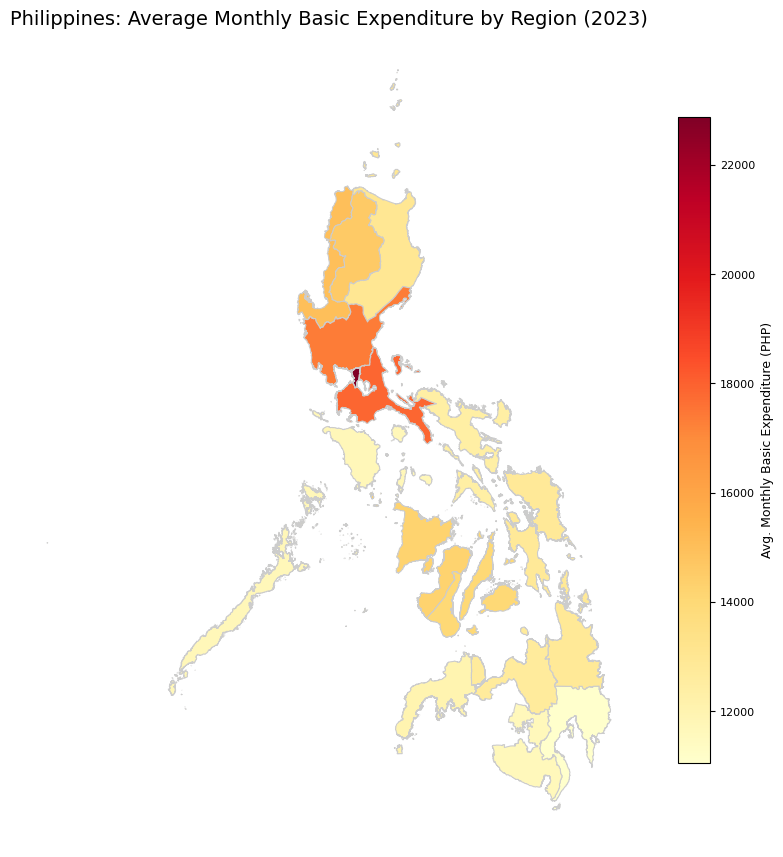

In [12]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load shapefile
ph_shp = gpd.read_file("./datasets/raw/Regions.shp.shp")

# Ensure CRS is lat/lon (safe for plotting)
ph_shp = ph_shp.to_crs(epsg=4326)

# Prepare FIES data (2023)
heat_map_2023 = fies_2023[['REGION', 'TOTAL_MONTHLY']].copy()

# Map FIES region names to shapefile names
REGION_MAP = {
    "Region I - Ilocos Region": "Region I (Ilocos Region)",
    "Region II - Cagayan Valley": "Region II (Cagayan Valley)",
    "Region III - Central Luzon": "Region III (Central Luzon)",
    "Region IVA - CALABARZON": "Region IV-A (CALABARZON)",
    "Region IVB - MIMAROPA": "MIMAROPA Region",
    "Region V - Bicol": "Region V (Bicol Region)",
    "Region VI - Western Visayas": "Region VI (Western Visayas)",
    "Region VII - Central Visayas": "Region VII (Central Visayas)",
    "Region VIII - Eastern Visayas": "Region VIII (Eastern Visayas)",
    "Region IX - Zamboanga Peninsula": "Region IX (Zamboanga Peninsula)",
    "Region X - Northern Mindanao": "Region X (Northern Mindanao)",
    "Region XI - Davao": "Region XI (Davao Region)",
    "Region XII - SOCCSKSARGEN": "Region XII (SOCCSKSARGEN)",
    "Region XIII - Caraga": "Region XIII (Caraga)",
    "National Capital Region": "National Capital Region (NCR)",
    "Cordillera Administrative Region": "Cordillera Administrative Region (CAR)",
    "Bangsamoro Autonomous Region in Muslim Mindanao":
        "Bangsamoro Autonomous Region In Muslim Mindanao"
}

heat_map_2023['REGION_MAPPED'] = heat_map_2023['REGION'].replace(REGION_MAP)

# Merge shapefile with FIES data
ph_map = ph_shp.merge(
    heat_map_2023,
    left_on='name',            # shapefile column
    right_on='REGION_MAPPED'   # mapped FIES regions
)

# Keep only what we need
ph_map = ph_map[['name', 'geometry', 'TOTAL_MONTHLY']]

# Plot choropleth (Matplotlib)
fig, ax = plt.subplots(1, 1, figsize=(10, 14))

plot = ph_map.plot(
    column='TOTAL_MONTHLY',
    cmap='YlOrRd',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    legend_kwds={
        'label': "Avg. Monthly Basic Expenditure (PHP)",
        'shrink': 0.6
    }
)

# Resize colorbar text
cbar = plot.get_figure().axes[-1]
cbar.tick_params(labelsize=8)
cbar.set_ylabel("Avg. Monthly Basic Expenditure (PHP)", fontsize=9)

# Title and cleanup
ax.set_title(
    "Philippines: Average Monthly Basic Expenditure by Region (2023)",
    fontsize=14
)
ax.axis('off')

plt.savefig('./datasets/clean/heatmap.png')
plt.show()
